# Model Tuning

In the previous notebooks, I tested different models for their general performance on the dataset. After that, I performed different methods of feature selection on the data. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('data/fetal_health.csv')

data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [10]:
data.shape

(2126, 22)

In [11]:
# drop columns identified to double information
data.drop(columns=['histogram_mean', 'histogram_median', 'histogram_width'], inplace=True)

In [12]:
## TODO: #3 Decide on how to select the columns -> dropping low variance features v. PCA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline



data = pd.read_csv("data/fetal_health.csv")

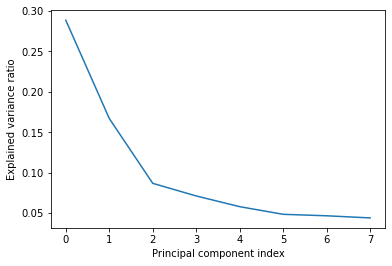

(2126, 21)
8 components selected


In [13]:
X = data.drop(columns=['fetal_health'])
y = data["fetal_health"]

pca_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("reducer", PCA(n_components=0.8))
])

pca_pipe.fit(X)

var = pca_pipe['reducer'].explained_variance_ratio_

plt.plot(var)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')

plt.show()
print(X.shape)
print(f'{len(pca_pipe["reducer"].components_)} components selected')
print(f'Components: {pca_pipe["reducer"].components_}')





In [11]:
pca_df = pca_pipe.fit_transform(X)
pca_df = pd.DataFrame(pca_df)
pca_df = pca_df.join(data["fetal_health"])

sns.pairplot(pca_df, hue="fetal_health")
plt.show()

pca_pipe["reducer"].explained_variance_ratio_.cumsum()

array([0.28849291, 0.45553003, 0.54240254, 0.61367487, 0.67169197,
       0.7202716 , 0.76702262, 0.81114321, 0.84744931, 0.87793524])